*This notebook plots the lastmile latency for DSL, CABLE and FIBRE probes separately for each service provider in SamKnows.*
- - - 

In [1]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import sqlite3
import pandas as pd

In [5]:
DB_LOCATION = 'lastmile.db'

In [6]:
METADATA_SNAPSHOT = 'metadata_snapshot'
METADATA_SNAPSHOT_EXTENSIONS = 'metadata_snapshot_extensions'
SK_ASN = 'sk_asn'
SK_ONE_OFF_EXTENSIONS = 'sk_one_off_extensions'
SK_LATENCIES_AGG = 'sk_latencies_agg'

In [7]:
con = sqlite3.connect(DB_LOCATION)

In [8]:
query_sk = '''SELECT      agg.probeid
                        , agg.timestamp
                        , s.asn
                        , meta.product
                        , s.asn_holder_name
                        , s.asn_access_type                
                        , ext.access_type_technology
                        , agg.h1_avg || ';' || agg.h2_avg as h1h2

               FROM   %s                             as  agg
                    , %s                             as  api
                    , %s                             as  s
                    , %s                             as  meta
                    , %s                             as  ext

               WHERE     agg.probeid                  =  api.probeid
               AND       agg.probeid                  =  ext.probeid
               AND       api.asn                      =  s.asn
               AND       agg.probeid                  =  meta.id

               AND       ext.if_residential           =  1
               AND       agg.h1_avg                   <>   0
               AND       agg.h2_avg                   <>   0

               
            '''%(  SK_LATENCIES_AGG
                 , METADATA_SNAPSHOT_EXTENSIONS
                 , SK_ASN
                 , METADATA_SNAPSHOT
                 , SK_ONE_OFF_EXTENSIONS
                )

df_sk = pd.read_sql(query_sk, con)

In [9]:
df_sk.count()

probeid                   435841
timestamp                 435841
asn                       435841
product                   435841
asn_holder_name           435841
asn_access_type           415903
access_type_technology    102512
h1h2                      435841
dtype: int64

In [10]:
df_sk.head()

,probeid,timestamp,asn,product,asn_holder_name,asn_access_type,access_type_technology,h1h2
0,14905,2014-07-28 00:36:14,2856,40,"BT-UK-AS BT Public Internet Service,GB",DSL,None,0.794;7.423
1,14905,2014-07-28 00:36:18,2856,40,"BT-UK-AS BT Public Internet Service,GB",DSL,None,0.787;7.41
2,14905,2014-07-28 12:36:52,2856,40,"BT-UK-AS BT Public Internet Service,GB",DSL,None,0.786;7.687
3,14905,2014-07-28 12:36:56,2856,40,"BT-UK-AS BT Public Internet Service,GB",DSL,None,0.808;7.539
4,14905,2014-07-28 16:36:10,2856,40,"BT-UK-AS BT Public Internet Service,GB",DSL,None,0.813;7.576


In [11]:
df_sk = df_sk.dropna(subset = ['h1h2'])

In [12]:
df_sk.count()

probeid                   435841
timestamp                 435841
asn                       435841
product                   435841
asn_holder_name           435841
asn_access_type           415903
access_type_technology    102512
h1h2                      435841
dtype: int64

In [13]:
df_sk.head()

,probeid,timestamp,asn,product,asn_holder_name,asn_access_type,access_type_technology,h1h2
0,14905,2014-07-28 00:36:14,2856,40,"BT-UK-AS BT Public Internet Service,GB",DSL,None,0.794;7.423
1,14905,2014-07-28 00:36:18,2856,40,"BT-UK-AS BT Public Internet Service,GB",DSL,None,0.787;7.41
2,14905,2014-07-28 12:36:52,2856,40,"BT-UK-AS BT Public Internet Service,GB",DSL,None,0.786;7.687
3,14905,2014-07-28 12:36:56,2856,40,"BT-UK-AS BT Public Internet Service,GB",DSL,None,0.808;7.539
4,14905,2014-07-28 16:36:10,2856,40,"BT-UK-AS BT Public Internet Service,GB",DSL,None,0.813;7.576


In [14]:
def calculate_lastmile_latency(h1h2):
    try: h1,h2 = h1h2.split(';')
    except Exception as e: print(e, type(e), h1h2); return None
    
    try: lastmile = float(h2) - float(h1)
    except Exception as e: print(e, type(e), h1, h2); return None
    
    return lastmile

In [15]:
df_sk['lastmile'] = df_sk['h1h2'].apply(calculate_lastmile_latency)

In [16]:
df_sk.head()

,probeid,timestamp,asn,product,asn_holder_name,asn_access_type,access_type_technology,h1h2,lastmile
0,14905,2014-07-28 00:36:14,2856,40,"BT-UK-AS BT Public Internet Service,GB",DSL,None,0.794;7.423,6.629
1,14905,2014-07-28 00:36:18,2856,40,"BT-UK-AS BT Public Internet Service,GB",DSL,None,0.787;7.41,6.623
2,14905,2014-07-28 12:36:52,2856,40,"BT-UK-AS BT Public Internet Service,GB",DSL,None,0.786;7.687,6.901
3,14905,2014-07-28 12:36:56,2856,40,"BT-UK-AS BT Public Internet Service,GB",DSL,None,0.808;7.539,6.731
4,14905,2014-07-28 16:36:10,2856,40,"BT-UK-AS BT Public Internet Service,GB",DSL,None,0.813;7.576,6.763


In [17]:
df_sk.count()

probeid                   435841
timestamp                 435841
asn                       435841
product                   435841
asn_holder_name           435841
asn_access_type           415903
access_type_technology    102512
h1h2                      435841
lastmile                  435841
dtype: int64

In [18]:
df_sk_groupby = df_sk.groupby('probeid')
df_sk_agg = df_sk_groupby['lastmile'].agg(['median'])
df_sk_merged = pd.merge(df_sk, df_sk_agg, left_on='probeid', right_index=True)

del df_sk_merged['timestamp']
del df_sk_merged['h1h2']
del df_sk_merged['lastmile']

df_sk_merged = df_sk_merged.drop_duplicates()
df_sk_merged.rename(columns={'median': 'lastmile_median'}, inplace=True)

In [19]:
df_sk_merged = df_sk_merged.sort('lastmile_median')

In [20]:
df_sk_merged.count()

probeid                   1245
asn                       1245
product                   1245
asn_holder_name           1245
asn_access_type           1187
access_type_technology     290
lastmile_median           1245
dtype: int64

In [21]:
df_sk_merged.head()

,probeid,asn,product,asn_holder_name,asn_access_type,access_type_technology,lastmile_median
411520,421758,13037,40,"ZEN-AS Zen Internet Ltd,GB",DSL,DSL,-46.8325
235617,146348,13037,80,"ZEN-AS Zen Internet Ltd,GB",DSL,DSL,-45.8645
53135,141004,2856,20,"BT-UK-AS BT Public Internet Service,GB",DSL,None,-44.1935
313640,148302,6871,80,"PLUSNET PlusNet PLC,GB",DSL,None,-43.7715
149707,143906,6871,80,"PLUSNET PlusNet PLC,GB",DSL,None,-41.7680


In [22]:
def myfunc(x):
    count = 0
    manual = x['asn_access_type']; rdns = x['access_type_technology']
    
    chosen = None
    if manual is None and rdns is None: chosen = None
    elif manual is None and rdns is not None: chosen = rdns
    elif manual is not None and rdns is None: chosen = manual
    elif manual == rdns: chosen = rdns
    elif manual != rdns:
        if rdns == 'FIBRE': chosen = rdns    
        else: print(x['probeid'], end=','); count += 1
        
    return chosen

df_sk_merged['chosen'] = df_sk_merged.apply(myfunc, axis=1)

146332,143508,143020,147324,141472,143084,

In [23]:
df_sk_merged[df_sk_merged.probeid == 143084  ]

,probeid,asn,product,asn_holder_name,asn_access_type,access_type_technology,lastmile_median,chosen
106248,143084,5089,8,"NTL Virgin Media Limited,GB",CABLE,DSL,42.8175,None


In [24]:
df_sk_merged.count()

probeid                   1245
asn                       1245
product                   1245
asn_holder_name           1245
asn_access_type           1187
access_type_technology     290
lastmile_median           1245
chosen                    1189
dtype: int64

In [25]:
def create_pretty_node_names(asn, holder):
    
    d = {
          'NTL'        : 'VIRGINMEDIA'
        , 'AS3215'     : 'ORANGE'        
        , 'VODANET'    : 'VODAFONE'
        , 'PROXAD'     : 'FREE'
        , 'ROADRUNNER' : 'TWC'
        , 'TDDE'       : 'TELEFONICA-DE'
        , 'TT'         : 'TALKTALK'
        , 'AS20712'    : 'A&A'
        
    }
    
    firstname = holder.split('-')[0].split(' ')[0]
    try: firstname = d[firstname]
    except Exception as e: pass
    
    if 'AS' in str(asn): nodename = '%s (%s)'%(firstname, asn)
    else: nodename = '%s (AS%s)'%(firstname, asn)
    return nodename

def myfunc(x):
    asn = x['asn']; holder = x['asn_holder_name']; 
    nodename = create_pretty_node_names(asn, holder)
    x['nodename'] = nodename
    return x

df_sk_merged = df_sk_merged.apply(myfunc, axis=1)

In [26]:
del df_sk_merged['asn_access_type']
del df_sk_merged['access_type_technology']
del df_sk_merged['asn']
del df_sk_merged['asn_holder_name']

In [27]:
df_sk_merged.head()

,probeid,product,lastmile_median,chosen,nodename
411520,421758,40,-46.8325,DSL,ZEN (AS13037)
235617,146348,80,-45.8645,DSL,ZEN (AS13037)
53135,141004,20,-44.1935,DSL,BT (AS2856)
313640,148302,80,-43.7715,DSL,PLUSNET (AS6871)
149707,143906,80,-41.7680,DSL,PLUSNET (AS6871)


In [28]:
df_sk_merged['nodename'] = df_sk_merged['nodename'].apply(lambda node: node.split(' ')[0])

In [29]:
df_sk_merged.count()

probeid            1245
product            1245
lastmile_median    1245
chosen             1189
nodename           1245
dtype: int64

In [30]:
df_sk_merged = df_sk_merged.dropna()

In [31]:
df_sk_merged.count()

probeid            1189
product            1189
lastmile_median    1189
chosen             1189
nodename           1189
dtype: int64

In [32]:
df_dsl   = df_sk_merged[df_sk_merged.chosen == 'DSL']
df_cable = df_sk_merged[df_sk_merged.chosen == 'CABLE']
df_fibre = df_sk_merged[df_sk_merged.chosen == 'FIBRE']

In [33]:
dsl_count   = df_dsl['probeid'].count()
cable_count = df_cable['probeid'].count()
fibre_count = df_fibre['probeid'].count()

print('dsl: %d'%(dsl_count))
print('cable: %d'%(cable_count))
print('fibre: %d'%(fibre_count))

print('total: %d'%(dsl_count + cable_count + fibre_count))

dsl: 994
cable: 195
fibre: 0
total: 1189


In [34]:
df_dsl_groupby = df_dsl.groupby(['nodename', 'product'])
df_cable_groupby = df_cable.groupby(['nodename', 'product'])
df_fibre_groupby = df_fibre.groupby(['nodename','product'])

In [35]:
def draw_cdf_step(df, nodename, index):
    
    if index >= 7: linestyle = 'dashed'
    else: linestyle = 'solid'
        
    n,bins,patches = \
    plt.hist (      df['lastmile_median'].values 
                  , normed=True
                  , cumulative=True
                  , histtype='step'
                  , label="%s (%d)"%(nodename, df['probeid'].count())          
                  , linewidth=7
                  , bins=df['probeid'].count()
                  , linestyle=(linestyle)
             );
    
    patches[0].set_xy(patches[0].get_xy()[:-1])

In [36]:
import Cdf

markers = ['d', 'x', '+', 'o', 'p', 'v', '8', '*', 'D', '<', 's']

def draw_cdf(df, nodename, index, ax):
    
    sample = df['lastmile_median'].values
    sample = [x for x in sample if x > 0]
    c = Cdf.MakeCdfFromList(sample)
    
    ax.plot (  c.xs
              , c.ps
              , marker=markers[index%11]
              , linewidth=0.3
              , markersize=5
              , fillstyle='none'
              , label="%s (%d)"%(nodename, df['probeid'].count())
             )

In [37]:
def start_plot():    
    # ------ plt.style.use('ggplot')
    #color_list = plt.cm.Set1(np.linspace(0, 1, num_colors))
    fig = plt.figure(figsize=(6,3))
    plt.rcParams['font.size'] = 22
    ax = fig.add_subplot(111)
    #ax.set_color_cycle(color_list)  
    return ax

In [38]:
def stop_plot(ax, chosen, count, extraname=''):
    
    d = {        
          '8 Mbps'  : 'ADSL1 [8 Mbps]'
        , '20 Mbps' : 'ADSL2+ [20 Mbps]'        
        , '40 Mbps' : 'VDSL [40 Mbps]'        
        , '80 Mbps' : 'VDSL [80 Mbps]'                
    }
    
    try: title = d[chosen]
    except Exception as e: title = chosen
    
    xticks = [1, 2, 4, 8, 16, 32, 64]
    yticks = np.arange(0,1.1,0.2)
    #ax.yaxis.set_label_coords(-0.15, 0.45)
    ax.grid(False)
    ax.set_yticks(yticks)
    ax.set_ylim([0,1.05])
    ax.set_xlim([1, 64])    
    ax.set_xscale('log', basex=2)
    ax.set_xlabel('Last-mile latency (ms)', fontsize=15)
    ax.set_ylabel('CDF (%d)'%count, fontsize=15)
    
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('axes', -0.05))
    ax.spines['left'].set_position(('axes', -0.05))
    
    ax.set_xticks(xticks, xticks)
    
    if chosen == 'FIBRE': ax.legend(fontsize=15, loc='lower right', ncol=1)
    elif chosen == '8 Mbps': ax.legend(fontsize=15, loc='best', bbox_to_anchor=(0.8, -0.5), ncol=1)        
    elif chosen == 'VIRGINMEDIA (AS5089)': ax.legend(fontsize=15, loc='best', ncol=1)                        
    else: ax.legend(fontsize=15, loc='best', bbox_to_anchor=(1.07, -0.5), ncol=2)        
    ax.set_title('%s (SamKnows)'%(title), fontsize=15, y=1.05)
    plt.savefig('samknows-%s-%s-lastmile-latency.pdf'%(chosen.split()[0], extraname), format='pdf', bbox_inches='tight')

In [39]:
def sort_by_bp(x):
    name = x[0][0]
    bb = x[0][1]
    try: bbp = int(bb)
    except Exception as e: print('.', end=''); return 0
    return bbp

In [40]:
d = {
      80 : 'VDSL'
    , 40 : 'VDSL'
    , 20 : 'ADSL2+'
    , 8 :  'ADSL1'
}

In [41]:
def draw_specific_isp(isp, ax):
    isp_count=0
    for index, (k, v) in enumerate(sorted(df_dsl_groupby.groups.items(), key=sort_by_bp , reverse=True)):
        if k[0] != isp: continue
        groups = df_dsl_groupby.get_group(k)
        probes = groups['probeid'].count()
        if probes < 10: continue               # if num(probes) < 10; don't plot :P    
        isp_count += probes
        bb = '%s Mbps'%(k[1])
        try: draw_cdf(groups, bb, index, ax)
        except Exception as e: print(e, k, groups['probeid'].count())
    return isp_count

..............................

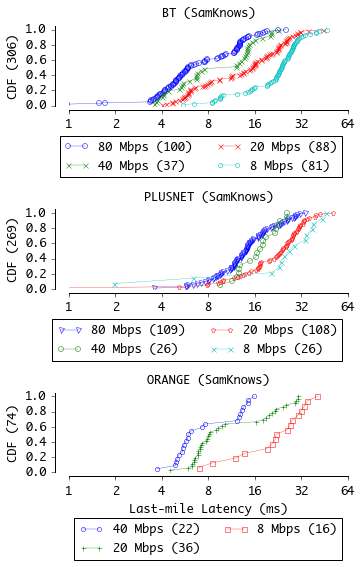

In [104]:
fig = plt.figure(figsize=(5,8))
plt.rcParams['font.size'] = 12
yticks = np.arange(0,1.1,0.2)

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312, sharex = ax1)
ax3 = fig.add_subplot(313, sharex = ax1)

isp = 'BT'
count = draw_specific_isp(isp, ax1)
stop_plot(ax=ax1, count=count, chosen=isp, extraname = 'marker')
ax1.set_ylabel('CDF (%d)'%count, fontsize=12)
ax1.legend(fontsize=12, loc='best', bbox_to_anchor=(1, -0.30), ncol=2)                                
ax1.set_title('%s (SamKnows)'%(isp), fontsize=12, y=1.05)


isp = 'PLUSNET'
count = draw_specific_isp(isp, ax2)
stop_plot(ax=ax2, count=count, chosen=isp, extraname = 'marker')
ax2.set_ylabel('CDF (%d)'%count, fontsize=12)
ax2.legend(fontsize=12, loc='best', bbox_to_anchor=(1, -0.30), ncol=2) 
ax2.set_title('%s (SamKnows)'%(isp), fontsize=12, y=1.05)

isp = 'ORANGE'
count = draw_specific_isp(isp, ax3)
stop_plot(ax=ax3, count=count, chosen=isp, extraname = 'marker')                            
ax3.set_ylabel('CDF (%d)'%count, fontsize=12)
ax3.legend(fontsize=12, loc='best', bbox_to_anchor=(1, -0.50), ncol=2) 
ax3.set_title('%s (SamKnows)'%(isp), fontsize=12, y=1.05)

xticklabels = ax1.get_xticklabels() + ax2.get_xticklabels()
plt.setp(xticklabels, visible=True)

fig.subplots_adjust(hspace = 1.3)

ax1.set_xlabel('', fontsize=12)
ax2.set_xlabel('', fontsize=12)
ax3.set_xlabel('Last-mile Latency (ms)', fontsize=12)

xticks = [1, 2, 4, 8, 16, 32, 64]
plt.xticks(xticks, xticks)    

plt.savefig('samknows-product-lastmile-latency.pdf', format='pdf', bbox_inches='tight')

In [57]:
df_dsl   = df_dsl[df_dsl['lastmile_median'] > 0]
df_cable = df_cable[df_cable['lastmile_median'] > 0]

In [58]:
df_dsl.head()

,probeid,product,lastmile_median,chosen,nodename
14242,35224,20,0.1115,DSL,A&A
194976,145012,80,0.1310,DSL,ECLIPSE
396176,243748,80,0.2595,DSL,BT
45233,140864,20,0.8830,DSL,PLUSNET
90417,142052,80,0.9680,DSL,BT


In [59]:
def strip_out_nodes_with_less_than_ten_probes(df):

    df_gby = df[['probeid', 'nodename']].groupby('nodename')
    df_agg = df_gby.agg([len])
    df = pd.merge(df, df_agg, left_on = 'nodename', right_index = True)
    df.columns = ['probeid', 'product', 'lastmile_median', 'chosen', 'nodename', 'num_probes']
    df = df[df['num_probes'] >= 10]
    return df

df_dsl   = strip_out_nodes_with_less_than_ten_probes(df_dsl)
df_cable = strip_out_nodes_with_less_than_ten_probes(df_cable)

In [60]:
dsl_count   = df_dsl['probeid'].count()
cable_count = df_cable['probeid'].count()
fibre_count = df_fibre['probeid'].count()

print('dsl: %d'%(dsl_count))
print('cable: %d'%(cable_count))
print('fibre: %d'%(fibre_count))

print('total: %d'%(dsl_count + cable_count + fibre_count))

dsl: 859
cable: 194
fibre: 0
total: 1053


In [61]:
df_dsl_asn_gby      = df_dsl.groupby('nodename')
dsl_probes_by_asn   = ['%d'%len(set(v['probeid'].values)) for k, v in df_dsl_asn_gby] 

In [62]:
def stop_plot_box(ax, chosen, count, probes_by_asn = [], fs = 22):
    
    ax2 = ax.twinx()
    ax.set_title(""); plt.suptitle("")
    ax2.set_ylim(ax.get_ylim())
    ax2.set_yticks(ax.get_yticks())
    ax2.set_yticklabels( probes_by_asn, fontsize = fs)
    ax2.yaxis.set_label_position("right")    
    if chosen != 'CABLE': ax2.set_ylabel('[%d probes]'%count, fontsize=fs)
    if chosen == 'CABLE': ax2.set_ylabel('[%d]'%count, fontsize=fs)        
        
    xticks = [1, 2, 4, 8, 16, 32, 64]
    ax.grid(False)
    ax.set_xlim([1, 64])
    ax.set_xscale('log', basex=2)
    ax.yaxis.set_label_position("left")    
    ax.set_xlabel('Last-mile latency (ms)', fontsize=fs)
    plt.xticks(xticks, xticks)    
    plt.suptitle('')
    plt.title('%s (SamKnows)'%(chosen), fontsize=fs, y=1.05)
    plt.savefig('samknows-%s-lastmile-latency-boxplot.pdf'%chosen, format='pdf', bbox_inches='tight')

In [63]:
def stop_plot_box_dsl(ax, chosen, count, probes_by_asn = [], shrink_right = True, fs = 22):
    
    d = {        
          '8 Mbps'  : 'ADSL1 [8 Mbps]'
        , '20 Mbps' : 'ADSL2+ [20 Mbps]'        
        , '40 Mbps' : 'VDSL [40 Mbps]'        
        , '80 Mbps' : 'VDSL [80 Mbps]'                
    }
    
    try: title = d[chosen]
    except Exception as e: title = chosen
    
    ax2 = ax.twinx()
    ax.set_title(""); plt.suptitle("")
    ax2.set_ylim(ax.get_ylim())
    ax2.set_yticks(ax.get_yticks())
    ax2.set_yticklabels( probes_by_asn, fontsize = fs)
    ax2.yaxis.set_label_position("right")    
    if shrink_right: ax2.set_ylabel('[%d]'%count, fontsize=fs)        
    else: ax2.set_ylabel('[%d probes]'%count, fontsize=fs)
    
    xticks = [1, 2, 4, 8, 16, 32, 64]
    ax.grid(False)
    ax.set_xlim([1, 64])
    ax.set_xscale('log', basex=2)
    ax.set_xlabel('Last-mile latency (ms)', fontsize=fs)
    plt.xticks(xticks, xticks)    
    plt.suptitle('')
    plt.title('%s (SamKnows)'%(title), fontsize=fs, y=1.05)
    plt.savefig('samknows-DSL-%s-lastmile-latency-boxplot.pdf'%chosen.split()[0], format='pdf', bbox_inches='tight')

In [64]:
def start_plot_box(height=6):    
    # ------ plt.style.use('ggplot')
    fig = plt.figure(figsize=(6,height))
    plt.rcParams['font.size'] = 22
    ax = fig.add_subplot(111)
    return ax

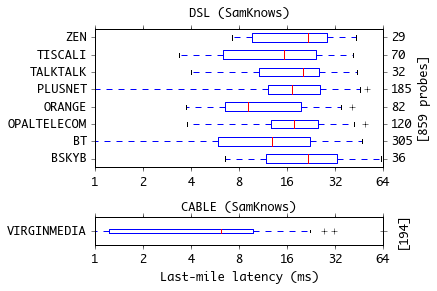

In [68]:
import matplotlib.gridspec as gridspec

fs = 12

fig = plt.figure(figsize=(5,4))
plt.rcParams['font.size'] = fs

gs = gridspec.GridSpec(2,1, width_ratios=[1], height_ratios=[5, 1])

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

ax1.set_xlabel('', fontsize=fs)
ax2.set_xlabel('', fontsize=fs)

a = df_dsl.boxplot (  column='lastmile_median'
                    , by=['nodename']
                    , ax=ax1
                    , vert=False
                 )

stop_plot_box(a, chosen='DSL', count=dsl_count, probes_by_asn = dsl_probes_by_asn, fs = fs)

a = df_cable.boxplot (    column='lastmile_median'
                        , by=['nodename']
                        , ax=ax2
                        , vert=False
                     )

stop_plot_box(a, chosen='CABLE', count=cable_count, fs = fs)

ax1.set_xlabel('', fontsize=fs)

xticklabels = ax1.get_xticklabels()
plt.setp(xticklabels, visible=True)

fig.subplots_adjust(hspace = 0.6)

plt.savefig('samknows-lastmile-latency-boxplot.pdf', format='pdf', bbox_inches='tight')

In [69]:
df_dsl_08 = df_dsl[df_dsl['product'] == 8]
df_dsl_20 = df_dsl[df_dsl['product'] == 20]
df_dsl_40 = df_dsl[df_dsl['product'] == 40]
df_dsl_80 = df_dsl[df_dsl['product'] == 80]

In [70]:
df_dsl_08.head()

,probeid,product,lastmile_median,chosen,nodename,num_probes
306586,147760,8,5.4885,DSL,BT,305
18632,37300,8,6.5010,DSL,BT,305
261212,146982,8,8.4705,DSL,BT,305
118453,143204,8,8.4895,DSL,BT,305
75417,141588,8,8.7430,DSL,BT,305


In [71]:
def strip_out_nodes_with_less_than_ten_probes(df):

    del df['num_probes']
    df_gby = df[['probeid', 'nodename']].groupby('nodename')
    df_agg = df_gby.agg([len])
    df = pd.merge(df, df_agg, left_on = 'nodename', right_index = True)
    df.columns = ['probeid', 'product', 'lastmile_median', 'chosen', 'nodename', 'num_probes']
    df = df[df['num_probes'] >= 10]
    return df

df_dsl_08  = strip_out_nodes_with_less_than_ten_probes(df_dsl_08)
df_dsl_20  = strip_out_nodes_with_less_than_ten_probes(df_dsl_20)
df_dsl_40  = strip_out_nodes_with_less_than_ten_probes(df_dsl_40)
df_dsl_80  = strip_out_nodes_with_less_than_ten_probes(df_dsl_80)

In [72]:
df_dsl_08_gby      = df_dsl_08.groupby('nodename')
df_dsl_20_gby      = df_dsl_20.groupby('nodename')
df_dsl_40_gby      = df_dsl_40.groupby('nodename')
df_dsl_80_gby      = df_dsl_80.groupby('nodename')

dsl_08_probes_by_asn  = ['%d'%len(set(v['probeid'].values)) for k, v in df_dsl_08_gby] 
dsl_20_probes_by_asn  = ['%d'%len(set(v['probeid'].values)) for k, v in df_dsl_20_gby] 
dsl_40_probes_by_asn  = ['%d'%len(set(v['probeid'].values)) for k, v in df_dsl_40_gby] 
dsl_80_probes_by_asn  = ['%d'%len(set(v['probeid'].values)) for k, v in df_dsl_80_gby] 

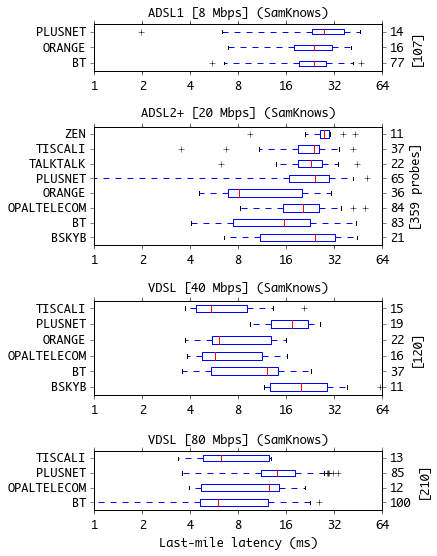

In [95]:
import matplotlib.gridspec as gridspec

fs = 12

fig = plt.figure(figsize=(5,9))
plt.rcParams['font.size'] = 12

gs = gridspec.GridSpec(4,1, width_ratios=[1], height_ratios=[2, 5, 4, 2.5])

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])

a = df_dsl_08.boxplot (  column='lastmile_median'
                        , by=['nodename']
                        , ax=ax1
                        , vert=False
                      )

stop_plot_box_dsl(a, chosen='8 Mbps', count=df_dsl_08['probeid'].count()
                  , probes_by_asn = dsl_08_probes_by_asn, fs = fs)

a = df_dsl_20.boxplot (  column='lastmile_median'
                        , by=['nodename']
                        , ax=ax2
                        , vert=False
                      )

stop_plot_box_dsl(a, chosen='20 Mbps', count=df_dsl_20['probeid'].count()
                  , probes_by_asn = dsl_20_probes_by_asn, shrink_right = False, fs = fs)                  

a = df_dsl_40.boxplot (  column='lastmile_median'
                        , by=['nodename']
                        , ax=ax3
                        , vert=False
                      )

stop_plot_box_dsl(a, chosen='40 Mbps', count=df_dsl_40['probeid'].count()
                  , probes_by_asn = dsl_40_probes_by_asn, fs = fs)                

a = df_dsl_80.boxplot (  column='lastmile_median'
                        , by=['nodename']
                        , ax=ax4
                        , vert=False
                      )

stop_plot_box_dsl(a, chosen='80 Mbps', count=df_dsl_80['probeid'].count()
                  , probes_by_asn = dsl_80_probes_by_asn, fs = fs)                                  

xticklabels = ax1.get_xticklabels() + ax2.get_xticklabels() + ax3.get_xticklabels()
plt.setp(xticklabels, visible=True)

fig.subplots_adjust(hspace = 0.7)

ax1.set_xlabel('', fontsize=12)
ax2.set_xlabel('', fontsize=12)
ax3.set_xlabel('', fontsize=12)

plt.savefig('samknows-dsl-product-lastmile-latency-boxplot.pdf', format='pdf', bbox_inches='tight')